In [ ]:
## in this notebook, we will plot the results of running Sorcha
## on a sample of objects of varying nongravitational accelerations

## MEW, 11 Feb 2026

In [40]:
import os
import numpy as np
import pandas as pd
import pylab as plt

import subprocess
import glob

In [41]:
## open each file and count up the number of unique object IDs

fnames = [] #'/home/ellie/research/lsst/sorcha_output/2000_obj/2000_obj_cart.csv']
fnames = fnames+glob.glob('/home/ellie/research/lsst/sorcha_output/2000_obj/2000_obj*30days.csv')

In [42]:
a1_counts = []
a1_nongrav = []

a2_counts = []
a2_nongrav = []

a3_counts = []
a3_nongrav = []

ofnames = []

for f in fnames: 
    df = pd.read_csv(f)

    if 'a1' in f:
        a1_counts.append(df['ObjID'].nunique())
        a1_nongrav.append(float(f.split('_')[-2]))#[:-4]))
        #print(df['fieldMJD_TAI'][0])
        ofname = f.split('/')[-1]
        ofname = ofname.split('.')[:-2]
        ofname = ofname[0]+'.0'
        print(ofname)
        ofnames.append(ofname)
    elif 'a2' in f:
        a2_counts.append(df['ObjID'].nunique())
        a2_nongrav.append(float(f.split('_')[-2]))#[:-4]))
        #print(df['fieldMJD_TAI'][0])
        ofname = f.split('/')[-1]
        ofname = ofname.split('.')[:-2]
        ofname = ofname[0]+'.0'
        print(ofname)
        ofnames.append(ofname)
    elif 'a3' in f:
        a3_counts.append(df['ObjID'].nunique())
        a3_nongrav.append(float(f.split('_')[-2]))#[:-4]))
        #print(df['fieldMJD_TAI'][0])
        ofname = f.split('/')[-1]
        ofname = ofname.split('.')[:-2]
        ofname = ofname[0]+'.0'
        print(ofname)
        ofnames.append(ofname)
    else:
        #print('saving gravity-only')
        grav_counts = df['ObjID'].nunique()
        ofname = f.split('/')[-1]
        ofname = ofname.split('.')[-2]
        ofname = ofname[:-7]
        print(ofname)
        ofnames.append(ofname)
        #print(df['fieldMJD_TAI'][0])

2000_obj_ng_a3_-6.0
2000_obj_ng_a3_-8.0
2000_obj_ng_a2_-11.0
2000_obj_ng_a3_-10.0
2000_obj_ng_a2_-10.0
2000_obj_ng_a2_-7.0
2000_obj_ng_a2_-8.0
2000_obj_ng_a1_-6.0
2000_obj_ng_a1_-8.0
2000_obj_cart
2000_obj_ng_a2_-9.0
2000_obj_ng_a2_-6.0
2000_obj_ng_a1_-9.0
2000_obj_ng_a3_-7.0
2000_obj_ng_a3_-9.0
2000_obj_ng_a1_-7.0
2000_obj_ng_a3_-12.0
2000_obj_ng_a3_-11.0
2000_obj_ng_a2_-12.0
2000_obj_ng_a1_-11.0
2000_obj_ng_a1_-12.0
2000_obj_ng_a1_-10.0


[394. 394. 394. 394. 394. 395. 398. 388.]


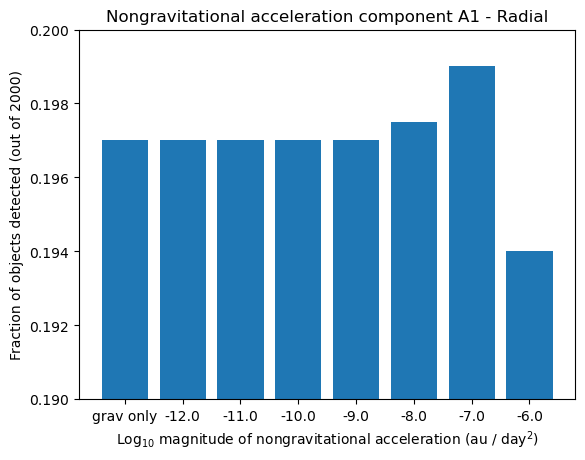

In [61]:
a1 = np.column_stack((np.array(a1_nongrav), np.array(a1_counts)))
sorted_idx = a1[:,0].argsort()
sorted_a1 = a1[sorted_idx]
sorted_a1 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a1))

print(sorted_a1[:,1])
ax_labels = sorted_a1[:,0].tolist()
ax_labels[0] = 'grav only'

ax_labels_str = []
for a in ax_labels:
    ax_labels_str.append(str(a))

plt.bar(ax_labels_str, sorted_a1[:,1]/2000)
#plt.ylim(1570,1600)
plt.ylim(0.19, 0.20)
plt.ylabel('Fraction of objects detected (out of 2000)')
plt.xlabel('Log$_{10}$ magnitude of nongravitational acceleration (au / day$^2$)')
plt.title('Nongravitational acceleration component A1 - Radial')
plt.savefig('sorcha_hist_a1.png')
plt.show()

[394. 394. 394. 393. 393. 394. 396. 392.]


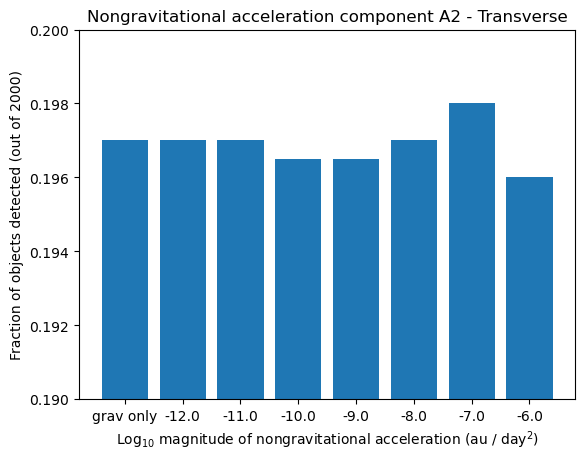

In [60]:
a2 = np.column_stack((np.array(a2_nongrav), np.array(a2_counts)))
sorted_idx = a2[:,0].argsort()
sorted_a2 = a2[sorted_idx]
sorted_a2 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a2))

print(sorted_a2[:,1])

plt.bar(ax_labels_str, sorted_a2[:,1]/2000)
#plt.ylim(1570,1600)
#plt.ylim(0.785,0.80)
plt.ylim(0.19, 0.20)
plt.ylabel('Fraction of objects detected (out of 2000)')
plt.xlabel('Log$_{10}$ magnitude of nongravitational acceleration (au / day$^2$)')
plt.title('Nongravitational acceleration component A2 - Transverse')
plt.savefig('sorcha_hist_a2.png')
plt.show()

[394. 394. 394. 394. 394. 394. 391. 395.]


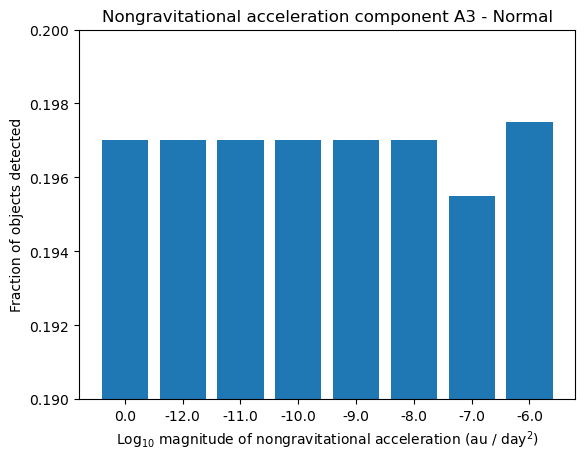

In [59]:
a3 = np.column_stack((np.array(a3_nongrav), np.array(a3_counts)))
sorted_idx = a3[:,0].argsort()
sorted_a3 = a3[sorted_idx]
sorted_a3 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a3))

print(sorted_a3[:,1])

plt.bar(sorted_a3[:,0].astype(str), sorted_a3[:,1]/2000)
#plt.ylim(1570,1600)
plt.ylim(0.785,0.80)
plt.ylim(0.19, 0.20)
plt.ylabel('Fraction of objects detected')
plt.xlabel('Log$_{10}$ magnitude of nongravitational acceleration (au / day$^2$)')
plt.title('Nongravitational acceleration component A3 - Normal')
plt.savefig('sorcha_hist_a3.png')
plt.show()

In [62]:
## how many linkages?
sfpath = "/home/ellie/research/lsst/sorcha_output/2000_obj/"

links = []

for n in range(len(ofnames)):

    if os.path.isfile('{0}LPLsum_{1}.csv'.format(sfpath, ofnames[n])):
        df_links = pd.read_csv('{0}LPLsum_{1}.csv'.format(sfpath, ofnames[n]))
        num_links = len(df_links)

        print(ofnames[n]+' - '+str(num_links))
        #plt.scatter(df_links['orbit_a'], df_links['orbit_e'], marker='.')
        links.append(num_links)
    else:
        print('{0}LPLsum_{1}.csv does not exist'.format(sfpath, ofnames[n]))

#plt.show()


2000_obj_ng_a3_-6.0 - 97
2000_obj_ng_a3_-8.0 - 96
2000_obj_ng_a2_-11.0 - 95
2000_obj_ng_a3_-10.0 - 94
2000_obj_ng_a2_-10.0 - 93
2000_obj_ng_a2_-7.0 - 88
2000_obj_ng_a2_-8.0 - 92
2000_obj_ng_a1_-6.0 - 91
2000_obj_ng_a1_-8.0 - 90
2000_obj_cart - 94
2000_obj_ng_a2_-9.0 - 89
2000_obj_ng_a2_-6.0 - 66
2000_obj_ng_a1_-9.0 - 94
2000_obj_ng_a3_-7.0 - 96
2000_obj_ng_a3_-9.0 - 94
2000_obj_ng_a1_-7.0 - 92
2000_obj_ng_a3_-12.0 - 98
2000_obj_ng_a3_-11.0 - 93
2000_obj_ng_a2_-12.0 - 94
2000_obj_ng_a1_-11.0 - 95
2000_obj_ng_a1_-12.0 - 92
2000_obj_ng_a1_-10.0 - 95


In [63]:
a1_links = []
a1_ngas = []

a2_links = []
a2_ngas = []

a3_links = []
a3_ngas = []

for l in range(len(ofnames)): 

    if 'a1' in ofnames[l]:
        a1_links.append(links[l])
        #print(ofnames[l].split('_')[-1])
        a1_ngas.append(float(ofnames[l].split('_')[-1]))
        print('a1: '+ofnames[l])

    elif 'a2' in ofnames[l]:
        a2_links.append(links[l])
        #print(ofnames[l].split('_')[-1])
        a2_ngas.append(float(ofnames[l].split('_')[-1]))
        print('a2: '+ofnames[l])
        
    elif 'a3' in ofnames[l]:
        a3_links.append(links[l])
        #print(ofnames[l].split('_')[-1])
        a3_ngas.append(float(ofnames[l].split('_')[-1]))
        print('a3: '+ofnames[l])
        
    else:
        #print('saving gravity-only')
        grav_links = links[l]

a3: 2000_obj_ng_a3_-6.0
a3: 2000_obj_ng_a3_-8.0
a2: 2000_obj_ng_a2_-11.0
a3: 2000_obj_ng_a3_-10.0
a2: 2000_obj_ng_a2_-10.0
a2: 2000_obj_ng_a2_-7.0
a2: 2000_obj_ng_a2_-8.0
a1: 2000_obj_ng_a1_-6.0
a1: 2000_obj_ng_a1_-8.0
a2: 2000_obj_ng_a2_-9.0
a2: 2000_obj_ng_a2_-6.0
a1: 2000_obj_ng_a1_-9.0
a3: 2000_obj_ng_a3_-7.0
a3: 2000_obj_ng_a3_-9.0
a1: 2000_obj_ng_a1_-7.0
a3: 2000_obj_ng_a3_-12.0
a3: 2000_obj_ng_a3_-11.0
a2: 2000_obj_ng_a2_-12.0
a1: 2000_obj_ng_a1_-11.0
a1: 2000_obj_ng_a1_-12.0
a1: 2000_obj_ng_a1_-10.0


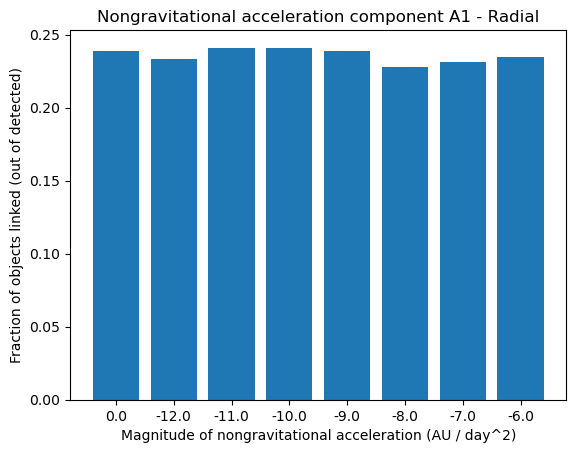

In [84]:
a1_l = np.column_stack((np.array(a1_ngas), np.array(a1_links)))
sorted_idx_l = a1_l[:,0].argsort()
sorted_a1_l = a1_l[sorted_idx_l]
sorted_a1_l = np.concatenate((np.array([[0.0, grav_links]]), sorted_a1_l))


a1_link_fraction = []
for k in range(len(sorted_a1_l)):
    a1_link_fraction.append(sorted_a1_l[:,1][k]/sorted_a1[:,1][k])

plt.bar(sorted_a1_l[:,0].astype(str), a1_link_fraction) #sorted_a1_l[:,1]/sorted_a1[:,1])
#plt.ylim(1570,1600)
#plt.ylim(0.75, 0.79)
plt.ylabel('Fraction of objects linked (out of detected)')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A1 - Radial')
plt.savefig('linkage_hist_a1.png')
plt.show()

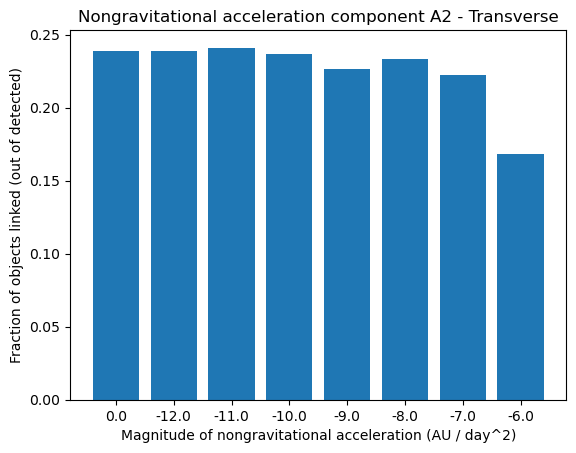

In [67]:
a2_l = np.column_stack((np.array(a2_ngas), np.array(a2_links)))
sorted_idx_l = a2_l[:,0].argsort()
sorted_a2_l = a2_l[sorted_idx_l]
sorted_a2_l = np.concatenate((np.array([[0.0, grav_links]]), sorted_a2_l))


a2_link_fraction = []
for m in range(len(sorted_a2_l)):
    a2_link_fraction.append(sorted_a2_l[:,1][m]/sorted_a2[:,1][m])

plt.bar(sorted_a2_l[:,0].astype(str), a2_link_fraction)
#plt.ylim(1570,1600)
#plt.ylim(0.75, 0.82)
plt.ylabel('Fraction of objects linked (out of detected)')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A2 - Transverse')
plt.savefig('linkage_hist_a2.png')
plt.show()

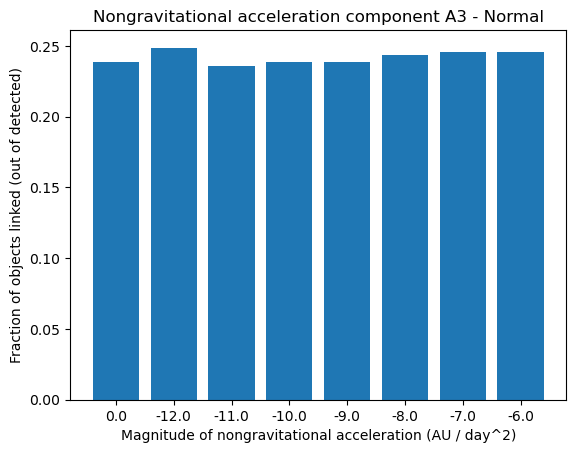

In [69]:
a3_l = np.column_stack((np.array(a3_ngas), np.array(a3_links)))
sorted_idx_l = a3_l[:,0].argsort()
sorted_a3_l = a3_l[sorted_idx_l]
sorted_a3_l = np.concatenate((np.array([[0.0, grav_links]]), sorted_a3_l))


a3_link_fraction = []
for m in range(len(sorted_a3_l)):
    a3_link_fraction.append(sorted_a3_l[:,1][m]/sorted_a3[:,1][m])

plt.bar(sorted_a3_l[:,0].astype(str), a3_link_fraction)
#plt.ylim(1570,1600)
#plt.ylim(0.75, 0.92)
plt.ylabel('Fraction of objects linked (out of detected)')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A3 - Normal')
plt.savefig('linkage_hist_a3.png')
plt.show()

In [85]:
## filter out corrupted linkages using parse_clust2det
## replace all code below -- ignore except what is useful

ngas = ['cart', -12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0] 
sfpath = "/home/ellie/research/lsst/sorcha_output/2000_obj/"
parse_fnames = []

for n in ngas:

    if n == 'cart':
        pairdet = f"{sfpath}pairdets_2000_obj_{str(n)}.csv"
        insum = f"{sfpath}LPLsum_2000_obj_{str(n)}.csv"
        clust2det = f"{sfpath}LPLclust2det_2000_obj_{str(n)}.csv"
        outfile = f"{sfpath}parse_clust2det_{str(n)}.csv"

        subprocess.run(['parse_clust2det','-pairdet',pairdet,'-insum', insum, '-clust2det', clust2det, '-out', outfile])
        parse_fnames.append(outfile)
        continue
    
    ## for a1
    pairdet_a1 = f"{sfpath}pairdets_2000_obj_ng_a1_{str(n)}.csv"
    insum_a1 = f"{sfpath}LPLsum_2000_obj_ng_a1_{str(n)}.csv"
    clust2det_a1 = f"{sfpath}LPLclust2det_2000_obj_ng_a1_{str(n)}.csv"
    outfile_a1 = f"{sfpath}parse_clust2det_a1_{str(n)}.csv"

    subprocess.run(['parse_clust2det','-pairdet',pairdet_a1,'-insum', insum_a1, '-clust2det', clust2det_a1, '-out', outfile_a1])

    ## for a2
    pairdet_a2 = f"{sfpath}pairdets_2000_obj_ng_a2_{str(n)}.csv"
    insum_a2 = f"{sfpath}LPLsum_2000_obj_ng_a2_{str(n)}.csv"
    clust2det_a2 = f"{sfpath}LPLclust2det_2000_obj_ng_a2_{str(n)}.csv"
    outfile_a2 = f"{sfpath}parse_clust2det_a2_{str(n)}.csv"

    subprocess.run(['parse_clust2det','-pairdet',pairdet_a2,'-insum', insum_a2, '-clust2det', clust2det_a2, '-out', outfile_a2])

    ## for a3
    pairdet_a3 = f"{sfpath}pairdets_2000_obj_ng_a3_{str(n)}.csv"
    insum_a3 = f"{sfpath}LPLsum_2000_obj_ng_a3_{str(n)}.csv"
    clust2det_a3 = f"{sfpath}LPLclust2det_2000_obj_ng_a3_{str(n)}.csv"
    outfile_a3 = f"{sfpath}parse_clust2det_a3_{str(n)}.csv"

    subprocess.run(['parse_clust2det','-pairdet',pairdet_a3,'-insum', insum_a3, '-clust2det', clust2det_a3, '-out', outfile_a3])

    parse_fnames.append(outfile_a1)
    parse_fnames.append(outfile_a2)
    parse_fnames.append(outfile_a3)

Checking out argv[1] = -pairdet.
Checking out argv[3] = -insum.
Checking out argv[5] = -clust2det.
Checking out argv[7] = -out.
input paired detection file /home/ellie/research/lsst/sorcha_output/2000_obj/pairdets_2000_obj_cart.csv
input cluster summary file /home/ellie/research/lsst/sorcha_output/2000_obj/LPLsum_2000_obj_cart.csv
input cluster-to-detection file /home/ellie/research/lsst/sorcha_output/2000_obj/LPLclust2det_2000_obj_cart.csv
output file /home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_cart.csv
Read 2024 data lines from paired detection file /home/ellie/research/lsst/sorcha_output/2000_obj/pairdets_2000_obj_cart.csv
Read 94 data lines from cluster summary file /home/ellie/research/lsst/sorcha_output/2000_obj/LPLsum_2000_obj_cart.csv
Read 1342 data lines from cluster-to-detection file /home/ellie/research/lsst/sorcha_output/2000_obj/LPLclust2det_2000_obj_cart.csv
Wrote cluster detection vector with 1342 entries
Writing 94 clusters to output file /home/elli

In [86]:
## why is a1_filtered_links returning all zeros? Sounds like an X File

a1_filtered_links = []
a1_all_links = []

a2_filtered_links = []
a2_all_links = []

a3_filtered_links = []
a3_all_links = []

for f in parse_fnames:
    
    cols = ['MJD','RA','Dec','mag','trail_len','trail_PA','sigmag','sig_across','sig_along',\
            'image','idstring','band','obscode','known_obj','det_qual','clusternum']
    
    df = pd.read_csv(f, skiprows=3, on_bad_lines='skip', names=cols, comment='#') #'warn')
    #print(df.head())
    
    cluster_nums = df['clusternum'].unique().tolist()
    bad_clusters = []
    #print(urows)

    prev_ids = []

    ## loop through each cluster and check if 
    for cluster in cluster_nums:
        df_cluster = df[df['clusternum'] == cluster]
        df_cluster.reset_index(drop=True, inplace=True) 

        #print(df_cluster['idstring'].nunique())
        
        if df_cluster['idstring'].nunique() == 1:
            ## now check if this id string has appeared in a previous linkage
            if df_cluster['idstring'][0] in prev_ids:
                bad_clusters.append(cluster)
            else:
                prev_ids.append(df_cluster['idstring'][0])
            
        else:
            bad_clusters.append(cluster)

    good_clusters = [item for item in cluster_nums if item not in bad_clusters]

    if 'a1' in f:
        a1_filtered_links.append(len(good_clusters))
        a1_all_links.append(len(cluster_nums))
        print('in a1')
        print(bad_clusters)
        print(f)
        continue

    if 'a2' in f:
        a2_filtered_links.append(len(good_clusters))
        a2_all_links.append(len(cluster_nums))
        print('in a2')
        print(bad_clusters)
        print(f)
        continue

    if 'a3' in f:
        a3_filtered_links.append(len(good_clusters))
        a3_all_links.append(len(cluster_nums))
        print('in a3')
        print(bad_clusters)
        print(f)
        continue

    else:
        grav_filtered_links = len(good_clusters)
        grav_all_links = len(cluster_nums)
        print('in grav only')
        print(bad_clusters)
        print(f)

print(grav_filtered_links)

print(a1_filtered_links)
print(a1_all_links)
print()

print(a2_filtered_links)
print(a2_all_links)
print()

print(a3_filtered_links)
print(a3_all_links)
print()

in grav only
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_cart.csv
in a1
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a1_-12.0.csv
in a2
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a2_-12.0.csv
in a3
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a3_-12.0.csv
in a1
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a1_-11.0.csv
in a2
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a2_-11.0.csv
in a3
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a3_-11.0.csv
in a1
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a1_-10.0.csv
in a2
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a2_-10.0.csv
in a3
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a3_-10.0.csv
in a1
[]
/home/ellie/research/lsst/sorcha_output/2000_obj/parse_clust2det_a1_-9.0.csv
in a2
[]
/home/ellie/research/lsst/sorcha

In [87]:
## so, here's what we did: 
## first, filtered out any "corrupted" links -- any
## that contained more than one object

## then, filtered out any links that contained an object that
## was also included in a previous linkage

[np.float64(0.9787234042553192), np.float64(1.0106382978723405), np.float64(1.0106382978723405), np.float64(1.0), np.float64(0.9550228925397253), np.float64(0.9688869881321501), np.float64(0.9830554946260145)]


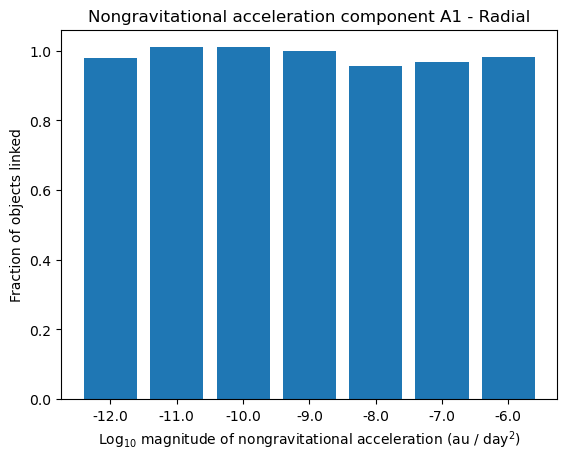

In [92]:
## now, plot the new link histograms: 

x_vals = np.array(ngas).astype(str).tolist()
x_vals[0] = 'only grav'

a1_filtered_links_g = [grav_filtered_links]+a1_filtered_links

a1_link_fraction = []
for m in range(len(a1_filtered_links_g)):
    a1_link_fraction.append(a1_filtered_links_g[m]/sorted_a1[:,1][m])

a1_link_frac_wrt_grav = []
for l in range(len(a1_link_fraction)-1):
    a1_link_frac_wrt_grav.append(a1_link_fraction[l+1]/a1_link_fraction[0])

print(a1_link_frac_wrt_grav)

plt.bar(x_vals[1:], a1_link_frac_wrt_grav)
#plt.bar(x_vals, a1_link_fraction)

#plt.bar(x_vals, [grav_all_links]+a1_all_links)
#plt.bar(x_vals, [grav_filtered_links]+a1_filtered_links)
#plt.ylim(1570,1600)
#plt.ylim(0.90, 1.0)
plt.ylabel('Fraction of objects linked')
plt.xlabel('Log$_{10}$ magnitude of nongravitational acceleration (au / day$^2$)')
plt.title('Nongravitational acceleration component A1 - Radial')
plt.savefig('linkage_hist_filtered_a1.png')
plt.show()

[np.float64(1.0), np.float64(1.0106382978723405), np.float64(0.9918791619295112), np.float64(0.9492176925992096), np.float64(0.9787234042553192), np.float64(0.9314420803782506), np.float64(0.7057099435518889)]


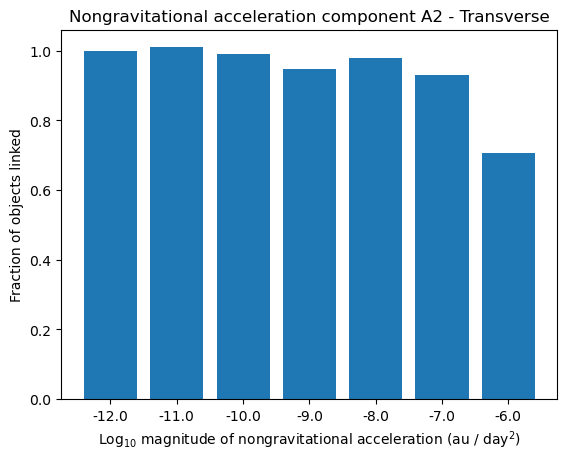

In [89]:
## now, plot the new link histograms: 

x_vals = np.array(ngas).astype(str).tolist()
x_vals[0] = 'only grav'

a2_filtered_links_g = [grav_filtered_links]+a2_filtered_links

a2_link_fraction = []
for m in range(len(a2_filtered_links_g)):
    a2_link_fraction.append(a2_filtered_links_g[m]/sorted_a2[:,1][m])

a2_link_frac_wrt_grav = []
for l in range(len(a2_link_fraction)-1):
    a2_link_frac_wrt_grav.append(a2_link_fraction[l+1]/a2_link_fraction[0])

print(a2_link_frac_wrt_grav)

plt.bar(x_vals[1:], a2_link_frac_wrt_grav)

#plt.ylim(0.90, 1.0)
plt.ylabel('Fraction of objects linked')
plt.xlabel('Log$_{10}$ magnitude of nongravitational acceleration (au / day$^2$)')
plt.title('Nongravitational acceleration component A2 - Transverse')
plt.savefig('linkage_hist_filtered_a2.png')
plt.show()

#plt.bar(x_vals, [grav_all_links]+a2_all_links)
#plt.bar(x_vals, a2_filtered_links)
#plt.bar(x_vals, a2_link_fraction)
#plt.ylim(1570,1600)
#plt.ylim(0.75, 0.92)

[np.float64(1.0425531914893618), np.float64(0.9893617021276596), np.float64(1.0), np.float64(1.0), np.float64(1.021276595744681), np.float64(1.0291124775534637), np.float64(0.9762456234850525)]


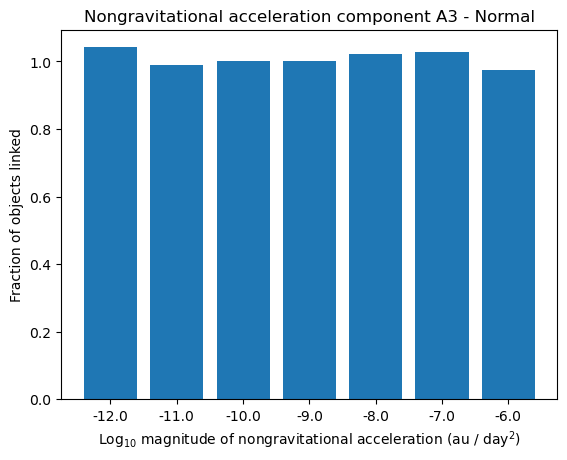

In [90]:
## now, plot the new link histograms: 

x_vals = np.array(ngas).astype(str).tolist()
x_vals[0] = 'only grav'

a3_filtered_links_g = [grav_filtered_links]+a3_filtered_links

a3_link_fraction = []
for m in range(len(a3_filtered_links_g)):
    #print(a3_filtered_links_g[m])
    #print(sorted_a3[:,1][m])
    a3_link_fraction.append(a3_filtered_links_g[m]/sorted_a3[:,1][m])

a3_link_frac_wrt_grav = []
for l in range(len(a3_link_fraction)-1):
    a3_link_frac_wrt_grav.append(a3_link_fraction[l+1]/a3_link_fraction[0])

print(a3_link_frac_wrt_grav)

plt.bar(x_vals[1:], a3_link_frac_wrt_grav)

#plt.ylim(0.90, 1.0)
plt.ylabel('Fraction of objects linked')
plt.xlabel('Log$_{10}$ magnitude of nongravitational acceleration (au / day$^2$)')

#plt.bar(x_vals, [grav_all_links]+a2_all_links)
#plt.bar(x_vals, a2_filtered_links)
#plt.bar(x_vals, a3_link_fraction)

#plt.bar(x_vals, [grav_all_links]+a3_all_links)
#plt.bar(x_vals, [grav_filtered_links]+a3_filtered_links)
#plt.ylim(1570,1600)
#plt.ylim(0.75, 0.92)
#plt.ylabel('Fraction of objects linked (out of detected)')
#plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A3 - Normal')
plt.savefig('linkage_hist_filtered_a3.png')
plt.show()

In [91]:
## need to add code here to check two things: 

## a. Do all the tracklets in a linkage correspond to the same object?
## b. Does one object ID appear in multiple linkages? 

## We can do this by tracing back through the make_tracklets, heliolinc, and link_purify output to link
## the cluster numbers back to the image numbers and thus to the object IDs

## there is clearly something wrong with my methods -- probably an issue with establishing
## the connection between cluster numbers and object ids. Anyway clearly something is 
## incorrect here, the number of successful linkages is too small and the trend makes no
## sense at all. 

## first, get correspondence between cluster number and detection number 
a1_links = []
a2_links = []
a3_links = []

n=0
prev_ids = []

for n in range(len(ofnames)):

    if os.path.isfile('{0}LPLsum_{1}.csv'.format(sfpath, ofnames[n])):
        df_links = pd.read_csv('{0}LPLsum_{1}.csv'.format(sfpath, ofnames[n]))
        df_ctd = pd.read_csv('{0}LPLclust2det_{1}.csv'.format(sfpath, ofnames[n]))
        df_trk2det = pd.read_csv('{0}trk2det_{1}.csv'.format(sfpath, ofnames[n]))
        df_trks = pd.read_csv('{0}tracklets_{1}.csv'.format(sfpath, ofnames[n]))
        df_pairs = pd.read_csv('{0}pairdets_{1}.csv'.format(sfpath, ofnames[n]))
        
        i=0
        linkages = 0
        ## loop over each cluster
        for i in range(len(df_links)):
            ## for a given cluster, identify the corresponding detections
            cluster_num = df_links['#clusternum'][i]
            #print(cluster_num)
            dets = df_ctd['detnum'][df_ctd['#clusternum'] == cluster_num].values
            #print(dets)

            ## find the tracklet corresponding to each detection
            trks = df_trk2det['#trk_ID'][df_trk2det['detnum'].isin(dets)].values
            #print(trks)

            ## find the "images" associated with each detection
            im1s = df_trks['#Image1'][df_trks['trk_ID'].isin(trks)].values
            im2s = df_trks['Image2'][df_trks['trk_ID'].isin(trks)].values

            imgs = im1s+im2s
            #print(im1s)
            #print(im2s)
            
            ## find the object id associated with each image
            ids = df_pairs['idstring'][df_pairs['image'].isin(imgs)].values
            #print(ids)
        
            ## check if the list of object ids contains more than one id or if all are the same
            unique_ids = np.unique(ids)
            if len(ids) == len(unique_ids):
                
                #print("No duplicates! Good to go")
                ## then check if any of the unique ids are in the accumulated ids
                ## from previous clusters 
                if len(prev_ids) != 0:
                    if len(list(set(ids) & set(prev_ids))) == 0:
                        #print("No intersections! Good to go")
                        linkages += 1
                        prev_ids = prev_ids+unique_ids.tolist()
                        continue
                        
                    else:
                        #print("Found an intersection, rejecting cluster")
                        prev_ids = prev_ids+unique_ids.tolist()
                        continue
                else:
                    #print("No previous ids yet, skipping")
                    linkages += 1 
                    prev_ids = prev_ids+unique_ids.tolist()
                    continue
                        
            else:
                #print("Duplicate found, rejecting cluster")
                prev_ids = prev_ids+unique_ids.tolist()
                continue 

        if 'cart' in ofnames[n]:
            print(ofnames[n]+' - '+str(linkages))
            gravonly = linkages
        else:
            print(ofnames[n]+' - '+str(linkages))#/gravonly))
        
    else:
        print('{0}LPLsum_{1}.csv does not exist'.format(sfpath, ofnames[n]))

2000_obj_ng_a3_-6.0 - 34
2000_obj_ng_a3_-8.0 - 17
2000_obj_ng_a2_-11.0 - 16
2000_obj_ng_a3_-10.0 - 12
2000_obj_ng_a2_-10.0 - 13
2000_obj_ng_a2_-7.0 - 14
2000_obj_ng_a2_-8.0 - 11
2000_obj_ng_a1_-6.0 - 12
2000_obj_ng_a1_-8.0 - 8
2000_obj_cart - 13
2000_obj_ng_a2_-9.0 - 11
2000_obj_ng_a2_-6.0 - 22
2000_obj_ng_a1_-9.0 - 11
2000_obj_ng_a3_-7.0 - 18
2000_obj_ng_a3_-9.0 - 10
2000_obj_ng_a1_-7.0 - 8
2000_obj_ng_a3_-12.0 - 16
2000_obj_ng_a3_-11.0 - 15
2000_obj_ng_a2_-12.0 - 11
2000_obj_ng_a1_-11.0 - 13
2000_obj_ng_a1_-12.0 - 11
2000_obj_ng_a1_-10.0 - 14


In [ ]:
a1 = np.column_stack((np.array(a1_nongrav), np.array(a1_counts)))
sorted_idx = a1[:,0].argsort()
sorted_a1 = a1[sorted_idx]
sorted_a1 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a1))
plt.bar(sorted_a1[:,0].astype(str), sorted_a1[:,1]/2000)
#plt.ylim(1570,1600)
plt.ylim(0.175, 0.19)
plt.ylabel('Fraction of objects detected (out of 2000)')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A1 - Radial')
plt.savefig('sorcha_hist_a1.png')
plt.show()

291


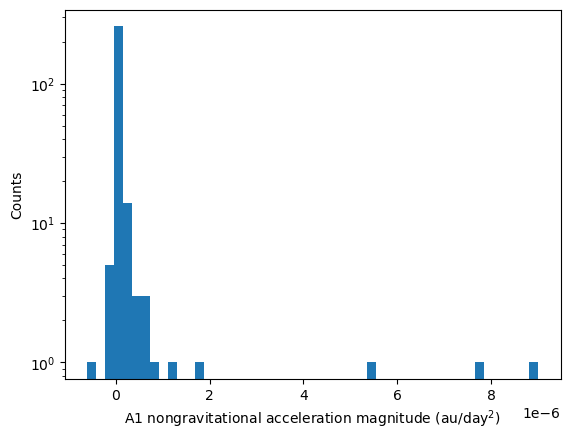

In [121]:
## create histogram plots for bodies in the JPL SBDB 

df_ng = pd.read_csv('sbdb_query_results.csv')

a1_idx = ~np.isnan(np.array(df_ng['A1']))
a1 = df_ng['A1'][a1_idx]
print(len(a1))

plt.hist(a1, bins=50, log=True)
plt.ylabel('Counts')
plt.xlabel('A1 nongravitational acceleration magnitude (au/day$^2$)')
#plt.xscale('log')
plt.savefig('a1_nongrav_counts.png')
plt.show()

887


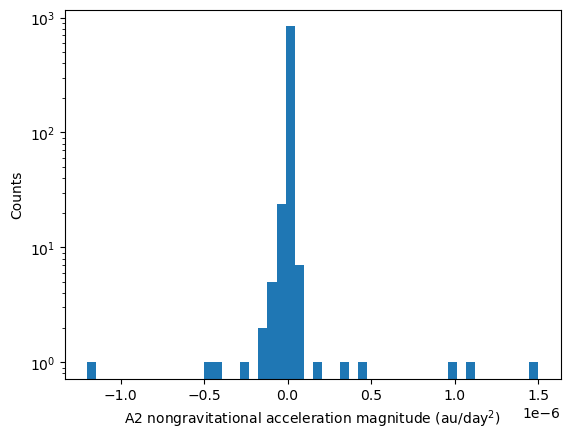

In [122]:
a2_idx = ~np.isnan(np.array(df_ng['A2']))
a2 = df_ng['A2'][a2_idx]
print(len(a2))

plt.ylabel('Counts')
plt.xlabel('A2 nongravitational acceleration magnitude (au/day$^2$)')
plt.hist(a2, bins=50, log=True)
plt.savefig('a2_nongrav_counts.png')
plt.show()

125


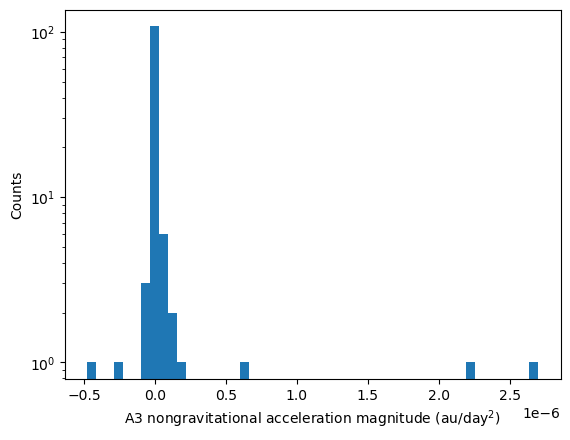

In [123]:
a3_idx = ~np.isnan(np.array(df_ng['A3']))
a3 = df_ng['A3'][a3_idx]
print(len(a3))

plt.hist(a3, bins=50, log=True)
plt.ylabel('Counts')
plt.xlabel('A3 nongravitational acceleration magnitude (au/day$^2$)')
plt.savefig('a3_nongrav_counts.png')
plt.show()